### **CS 715 - Project : Predicting Stock Prices Using a Three-Layer LSTM Model on Alphabet Inc (GOOG)**

#### **Introduction**
Hansun and Young demonstrated the efficacy of a three-layer LSTM model in predicting the closing prices of stocks in the LQ45 financial index. Their approach involved preprocessing financial time series data, applying normalization, and utilizing an LSTM model comprising an LSTM layer, a dropout layer to prevent overfitting, and a dense layer as the output. The study yielded promising results, with performance evaluated using Mean Absolute Percentage Error (MAPE) and Root Mean Square Error (RMSE).
This project proposes to extend their methodology to a new domain: the stock price prediction of Alphabet Inc (GOOG). Unlike the LQ45 index stocks, Alphabet Inc represents a technology-focused, highly traded security on the NASDAQ stock exchange, offering an opportunity to explore the model's adaptability and robustness in predicting prices in a different market segment.


#### **Objective**
This project aims to apply and evaluate the three-layer Long Short-Term Memory (LSTM) neural network model proposed by Hansun and Young (2021) to predict the Open, Close, High, and Low prices of Alphabet Inc (GOOG). By leveraging the principles and methodology described in their study, this project will adapt the model to a different dataset and assess its effectiveness.



This project will follow the steps that were described in the said research to verify their findings and result.

**Steps**
1. **Setup and Import Libraries**
1. **Data Collection and Preprocessing**
1. **Model Architecture**
1. **Evaluate the Model**
1. **Visualization of Results**

### **Step 1 : Setup and Import Libraries**

In [ ]:
# Installing required libraries

!pip install yfinance
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow

In [ ]:
# Importing Libraries for the project
import yfinance as yf             # Yahoo Finance API
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


### **Step 2 : Data Collection and Preprocessing**

Fetching data from Yahoo Finance API

In [ ]:
# Fetch data from Yahoo Finance
ticker = 'GOOG'
google_stock_df = yf.download(ticker, start='2010-01-01', end='2023-12-31')

google_stock_df_w_date = google_stock_df.copy()
google_stock_df_w_date.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


Displaying raw data

In [ ]:
google_stock_df.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2010-01-04,15.554352,15.610239,15.678981,15.547723,15.615220,78541293
2010-01-05,15.485854,15.541497,15.637387,15.480475,15.620949,120638494
2010-01-06,15.095475,15.149715,15.588072,15.102393,15.588072,159744526
2010-01-07,14.744060,14.797037,15.193053,14.760922,15.178109,257533695
2010-01-08,14.940616,14.994298,15.024933,14.672753,14.744733,189680313
2010-01-11,14.918032,14.971633,15.055070,14.795543,15.055070,289597429
2010-01-12,14.654221,14.706875,14.898158,14.645107,14.885456,194859654
2010-01-13,14.570089,14.622441,14.654571,14.293923,14.358431,260838034


In [ ]:
google_stock_df.tail(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2023-12-15,133.360825,133.839996,134.830002,132.630005,132.919998,58569400
2023-12-18,136.698822,137.190002,138.380005,133.770004,133.860001,25699800
2023-12-19,137.605576,138.100006,138.770004,137.449997,138.000000,20661000
2023-12-20,139.159973,139.660004,143.078003,139.410004,140.330002,33507300
2023-12-21,141.292328,141.800003,142.029999,140.473007,140.770004,18101500
2023-12-22,142.209030,142.720001,143.250000,142.054993,142.130005,18494700
2023-12-26,142.308670,142.820007,143.945007,142.500000,142.979996,11170100
2023-12-27,140.933624,141.440002,143.320007,141.050995,142.830002,17288400


Selecting relevant columns of stock price.

In [ ]:
google_stock_df = google_stock_df[['Open', 'High', 'Low', 'Close']]
google_stock_df.tail()

Price,Open,High,Low,Close
Ticker,GOOG,GOOG,GOOG,GOOG
Date,,,,
2023-12-22,142.130005,143.250000,142.054993,142.720001
2023-12-26,142.979996,143.945007,142.500000,142.820007
2023-12-27,142.830002,143.320007,141.050995,141.440002
2023-12-28,141.850006,142.270004,140.828003,141.279999
2023-12-29,140.679993,141.434998,139.899994,140.929993


detecting null data

In [ ]:
google_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Open, GOOG)   3522 non-null   float64
 1   (High, GOOG)   3522 non-null   float64
 2   (Low, GOOG)    3522 non-null   float64
 3   (Close, GOOG)  3522 non-null   float64
dtypes: float64(4)
memory usage: 137.6 KB


Summary statistics


In [ ]:
google_stock_df.describe()

Price,Open,High,Low,Close
Ticker,GOOG,GOOG,GOOG,GOOG
count,3522.000000,3522.000000,3522.000000,3522.000000
mean,53.974854,54.539478,53.442152,54.002097
std,39.513800,39.983905,39.095257,39.543130
min,10.916831,11.015710,10.800268,10.861040
25%,21.819963,21.933164,21.703276,21.831732
50%,39.948000,40.186501,39.673250,39.873001
75%,73.505875,74.392374,72.947187,73.712002
max,151.863495,152.100006,149.887497,150.709000


Just to be safe we are going to fill any null data with forward fill

In [ ]:
google_stock_df.ffill(inplace=True)
google_stock_df.tail(10)

Price,Open,High,Low,Close
Ticker,GOOG,GOOG,GOOG,GOOG
Date,,,,
2023-12-15,132.919998,134.830002,132.630005,133.839996
2023-12-18,133.860001,138.380005,133.770004,137.190002
2023-12-19,138.000000,138.770004,137.449997,138.100006
2023-12-20,140.330002,143.078003,139.410004,139.660004
2023-12-21,140.770004,142.029999,140.473007,141.800003
2023-12-22,142.130005,143.250000,142.054993,142.720001
2023-12-26,142.979996,143.945007,142.500000,142.820007
2023-12-27,142.830002,143.320007,141.050995,141.440002


Data distributions


In [ ]:
column_names = ['Open', 'High', 'Low', 'Close']
color_names = ['darkslategrey', 'darkkhaki', 'palevioletred', 'darkseagreen']
i = 0
for column in column_names:
  #print(f'{column}'.split(','))
  hist_data = [google_stock_df[f'{column}'].to_numpy().flatten()]
  group_labels = [f'{column}'] # name of the dataset
  fig = ff.create_distplot(hist_data, group_labels, bin_size = 5, colors = [color_names[i]])
  fig.update_layout(title_text=f'Distribution of {column}')
  fig.show()
  i += 1


Plotting candlestick chart of data

In [ ]:
# To reset the index of Date and use it as a column to plot charts
google_stock_df.reset_index(inplace=True)

In [ ]:

# Creating a candlestick chart using Plotly

fig = go.Figure(data=[go.Candlestick(x=google_stock_df['Date'].to_numpy().flatten(),
                open=google_stock_df['Open'].to_numpy().flatten(),
                high=google_stock_df['High'].to_numpy().flatten(),
                low=google_stock_df['Low'].to_numpy().flatten(),
                close=google_stock_df['Close'].to_numpy().flatten())])
fig.update_layout(height=1500)
fig.update_layout(
    title=dict(text='Google Stock data'),
    yaxis=dict(
      title=dict(
        text='GOOG Stock'
        )
    ))
fig.show()


Preprocessing data
Normalizing data using minmax scalerr from sklearn and creating sequential batches for LSTM input for look back period

In [ ]:
google_stock_df.set_index('Date', inplace=True)

In [ ]:
# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(google_stock_df)

# Prepare sequences for LSTM (60 time steps)
def create_sequences(data, time_steps=60):
    x, y = [], []
    for i in range(time_steps, len(data)):
        x.append(data[i-time_steps:i])
        y.append(data[i])
    return np.array(x), np.array(y)

time_steps = 60
x, y = create_sequences(scaled_data, time_steps)

# Split into training and test sets (80:20)
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f'Training set size: {len(y_train)}')
print(f'Test set size: {len(y_test)}')

Training set size: 2769
Test set size: 693


### **Step 3 : Model Architecture**

Implementing the same architecture as in the research paper but making variations in Dense layer as we are going to predict 4 variables at once.

In [ ]:
# Defining the model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(4)  # 4 outputs for Open, High, Low, Close
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          42,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,804 (479.70 KB)

 Trainable params: 122,804 (479.70 KB)

 Non-trainable params: 0 (0.00 B)

###**Step 4: Training the model**

Using the same methods as used in the research paper for training the model.

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - loss: 0.0115 - val_loss: 0.0033
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 9.2110e-04 - val_loss: 0.0040
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 7.1829e-04 - val_loss: 0.0027
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 7.1467e-04 - val_loss: 0.0019
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 5.5001e-04 - val_loss: 0.0013
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - loss: 5.5431e-04 - val_loss: 9.8010e-04
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 5.1315e-04 - val_loss: 0.0010
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 4.2499e-04 - val_loss: 0.0011
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - loss: 4.2452e-04 - val_loss: 0.0017
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - loss: 3.9261e-04 - val_loss: 8.7177e-04
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 3.8152e-04 - val_loss: 0.0021
Ep

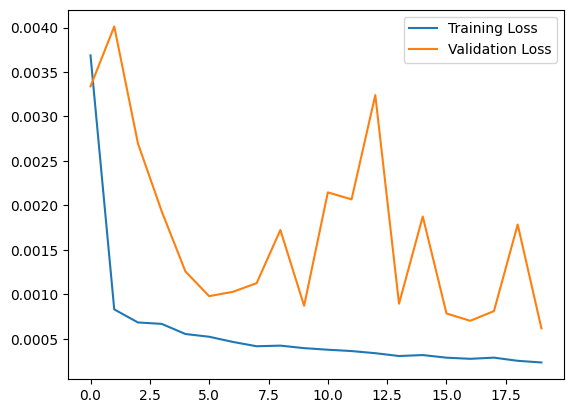

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
import keras
model = keras.saving.load_model('model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning:

Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 



###**Step 5: Evaluating the model**

Using the same methods as used in the research paper for evaulating the model.

In [ ]:
# Make predictions
y_pred = model.predict(x_test)
# Invert scaling for true and predicted values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
RMSE: 3.4846412045356177
MAPE: 0.022900257718206717


In [ ]:
model.save('model.keras')

### **Step 6 : Visualizing the Results**

Test set actual values and predicted values.

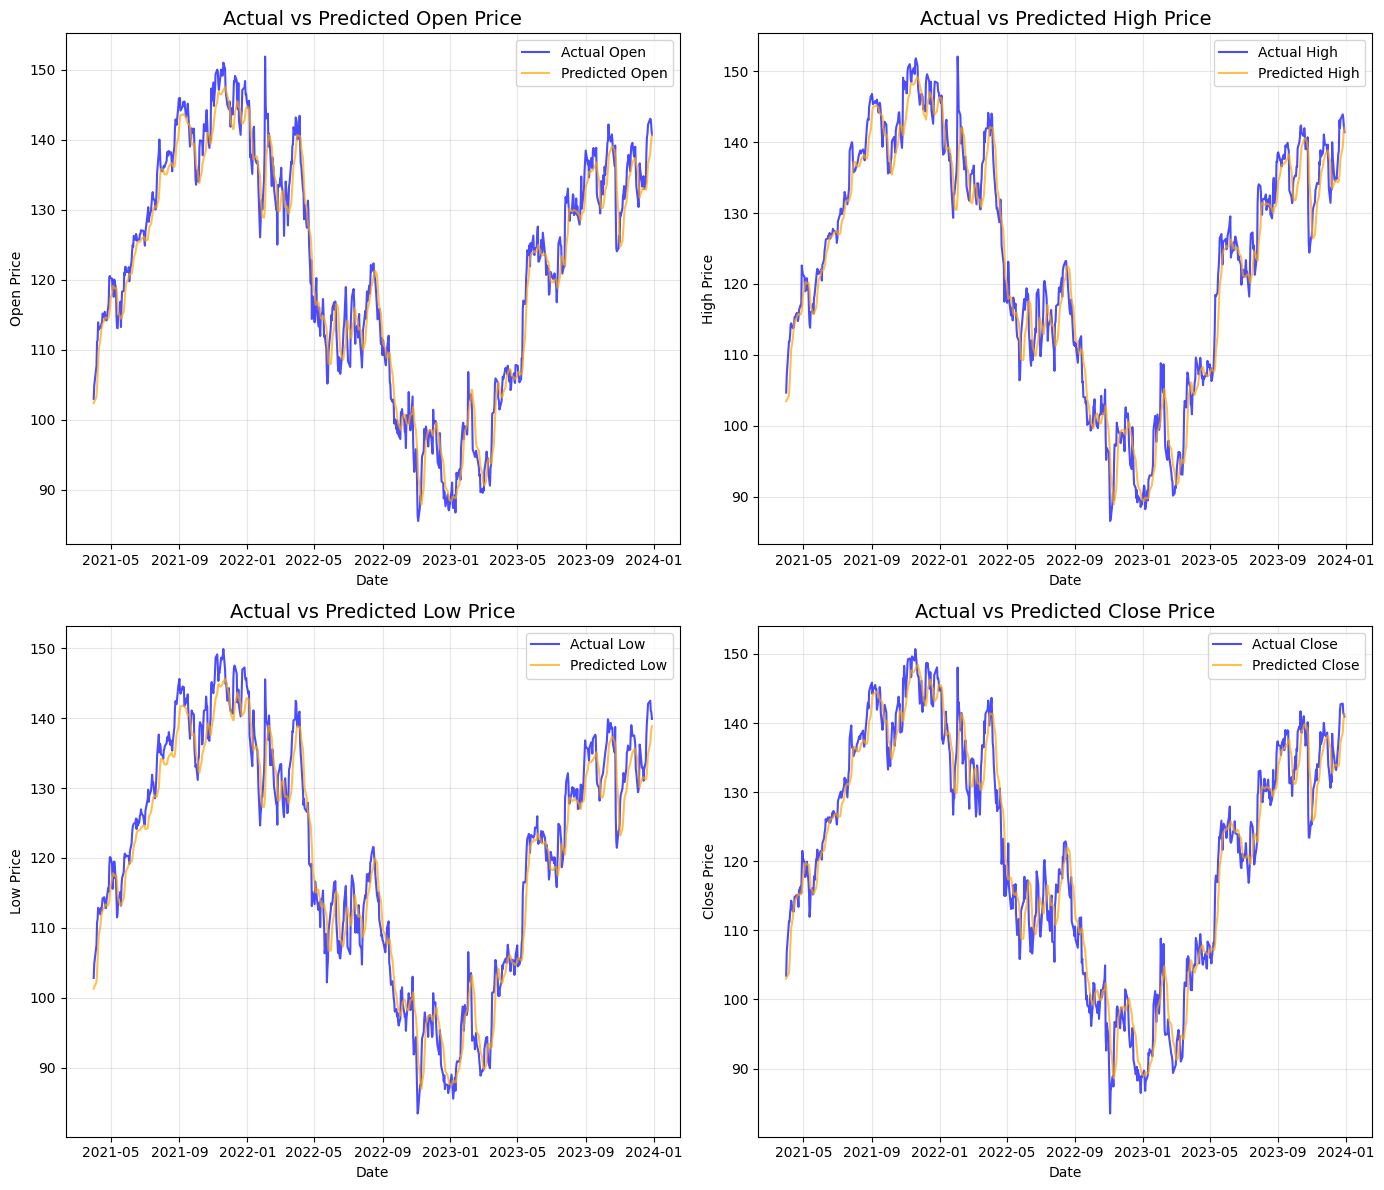

In [ ]:

# Feature names corresponding to the columns
features = ['Open', 'High', 'Low', 'Close']
dates = google_stock_df_w_date['Date'].iloc[train_size + time_steps:].to_numpy()
# Creating subplots for each feature
plt.figure(figsize=(14, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of plots
    plt.plot(dates, y_test_inv[:, i], label=f'Actual {feature}', color='blue', alpha=0.7)
    plt.plot(dates, y_pred_inv[:, i], label=f'Predicted {feature}', color='orange', alpha=0.7)

    # Adding title and labels
    plt.title(f'Actual vs Predicted {feature} Price', fontsize=14)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel(f'{feature} Price', fontsize=10)
    plt.legend()
    plt.grid(alpha=0.3)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Final Visualization as Candlestick Chart

In [ ]:
google_stock_df.reset_index(inplace=True)

In [ ]:
high_pred = google_stock_df['High'].iloc[60:].to_numpy().flatten()
high_pred = high_pred[:train_size]
high = google_stock_df['High'].iloc[60:]
high = high[:train_size]
print(len(high))
print(len(high_pred))
print(len(google_stock_df['Date'].iloc[60:].iloc[:train_size]))
print(google_stock_df['Date'].iloc[60:].iloc[train_size])


2769
2769
2769
2021-03-31 00:00:00


In [ ]:
# Data Minus the time steps.
high = google_stock_df['High'].iloc[60:].to_numpy().flatten()
open = google_stock_df['Open'].iloc[60:].to_numpy().flatten()
low = google_stock_df['Low'].iloc[60:].to_numpy().flatten()
close = google_stock_df['Close'].iloc[60:].to_numpy().flatten()



# Appending predicted data
high_pred = np.append(high[:train_size], y_pred_inv[:, 1])
low_pred = np.append(low[:train_size] ,y_pred_inv[:, 2])
open_pred = np.append(open[:train_size], y_pred_inv[:, 0])
close_pred = np.append(close[:train_size], y_pred_inv[:, 3])

fig = go.Figure(data=[go.Candlestick(x=google_stock_df['Date'].iloc[60:].to_numpy().flatten(),
                open=open,
                high=high,
                low=low,
                close=close)])
fig.update_layout(height=1000)
fig.update_layout(
    title=dict(text='Google Stock data original'),
    yaxis=dict(
      title=dict(
        text='GOOG Stock'
        )
    ),
        shapes = [dict(
        x0=google_stock_df['Date'].iloc[60:].iloc[train_size], x1=google_stock_df['Date'].iloc[60:].iloc[train_size] , y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x=google_stock_df['Date'].iloc[60:].iloc[train_size], y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Test Set')])
fig.show()

fig2 = go.Figure(data=[go.Candlestick(x=google_stock_df['Date'].iloc[60:].to_numpy().flatten(),
                open=open_pred,
                high=high_pred,
                low=low_pred,
                close=close_pred)])
fig2.update_layout(height=1000)
fig2.update_layout(
    title=dict(text='Google Stock data prediction'),
    yaxis=dict(
      title=dict(
        text='GOOG Stock'
        )
    ),    shapes = [dict(
        x0=google_stock_df['Date'].iloc[60:].iloc[train_size], x1=google_stock_df['Date'].iloc[60:].iloc[train_size], y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x=google_stock_df['Date'].iloc[60:].iloc[train_size], y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Predicted Data')]

    )
fig2.show()

#print(np.append (google_stock_df['High'].iloc[ :train_size + time_steps].to_numpy().flatten(),y_pred_inv[:, 1]))